<a href="https://colab.research.google.com/github/hikmatfarhat-ndu/pytorch/blob/main/pytorch_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch as t
import numpy as np

In [ ]:
from torch.autograd import Variable
x=Variable(t.tensor([[1.,2.],[3.,4.]]),requires_grad=True)

In [ ]:
x=t.tensor([[1.,2.],[3.,4.]],requires_grad=True)

In [ ]:

y=2*x.mean()**2+4*x.mean()+17
x.mean()
y.retain_grad()

Let $m$ be the mean so we can write $y=2m^2+4m+17$

Then $\frac{\partial y}{\partial x_i}=4m\frac{\partial m}{\partial x_i}+4\frac{\partial m}{\partial x_i}$

On the other hand $\frac{\partial m}{\partial x_i}=\frac{1}{4}$ therefore

$\frac{\partial y}{\partial x_i}=m+1$

In [ ]:
y.backward()

In [ ]:
print(x.grad)

tensor([[3.5000, 3.5000],
        [3.5000, 3.5000]])


In [ ]:
z=2*y
z.backward()

In [ ]:
x.grad

tensor([[7., 7.],
        [7., 7.]])

In [ ]:
y.grad

tensor(2.)

In [ ]:
a=t.randn(5,2,requires_grad=True)

In [ ]:
a

tensor([[-1.7342, -0.5474],
        [-0.5061, -0.3243],
        [ 0.5127, -1.9990],
        [-0.0085,  1.2359],
        [-0.2280,  0.9099]], requires_grad=True)

In [ ]:
b=2*a.max()

In [ ]:
b.backward()

In [ ]:
a.grad

tensor([[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 2.],
        [0., 0.]])

In [ ]:
import torchvision

In [ ]:
cifar10_train=torchvision.datasets.CIFAR10(".",download=True)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./cifar-10-python.tar.gz to .


In [ ]:
cifar10_test=torchvision.datasets.CIFAR10(".",download=True,train=False)

Files already downloaded and verified


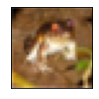

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(1.5,1.5))
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
plt.imshow(cifar10_train.data[0])

In [ ]:
img_train=t.tensor(cifar10_train.data)
img_test=t.tensor(cifar10_test.data)
print(img_train.size())
print(img_test.size())

torch.Size([50000, 32, 32, 3])
torch.Size([10000, 32, 32, 3])


In [ ]:
img_train=img_train.reshape(50000,32*32*3)/255.
img_test=img_test.reshape(10000,32*32*3)/255.

In [ ]:
img_train.max()

tensor(1.)

In [ ]:
label_train=t.tensor(cifar10_train.targets)
label_test=t.tensor(cifar10_test.targets)

In [ ]:
label_train[0]

tensor(6)

In [ ]:
feature=8
for i in range(label_train.shape[0]):
    if label_train[i]==feature:
        label_train[i]=1
    else:
        label_train[i]=0

for i in range(label_test.shape[0]):
    if label_test[i]==feature:
        label_test[i]=1
    else:
        label_test[i]=0        

In [ ]:
def sigmoid(z):
    s = 1/(1+t.exp(-z))
    return s

In [ ]:
from torch.nn import Sigmoid

In [ ]:
weights=t.randn(3072)
b=t.zeros(1,requires_grad=True)

In [ ]:
def forward(w,b,x,y):
  z=t.matmul(x,w)+b
  return sigmoid(z)


In [ ]:
weights.size()

torch.Size([3072])

In [ ]:
a=forward(weights,b,img_train,None)

In [ ]:
n=a.size(dim=0)

In [ ]:
a.backward(gradient=weights)

RuntimeError: ignored

In [ ]:
import torch as t
t.__version__

'1.12.1+cu113'

In [ ]:
x=t.tensor([2.,1.],requires_grad=True)
M=t.tensor([[1.,2.],[3.,4.]])
y=t.matmul(x,M)
print(y)

tensor([5., 8.], grad_fn=<SqueezeBackward3>)


In [ ]:
y.backward(t.tensor([1.,0.]),retain_graph=True)
print(x.grad.data)
x.grad.data.zero_()
y.backward(t.tensor([0.,1.]),retain_graph=True)
print(x.grad.data)
x.grad.data.zero_()
y.backward(t.tensor([1.,1.]),retain_graph=True)
print(x.grad.data)


tensor([1., 3.])
tensor([2., 4.])
tensor([3., 7.])
